## ResNet

In [16]:
from torchvision import models

In [17]:
resnet = models.resnet101(pretrained = True)

In [18]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [20]:
from PIL import Image
img = Image.open("./data/alo.jpg")

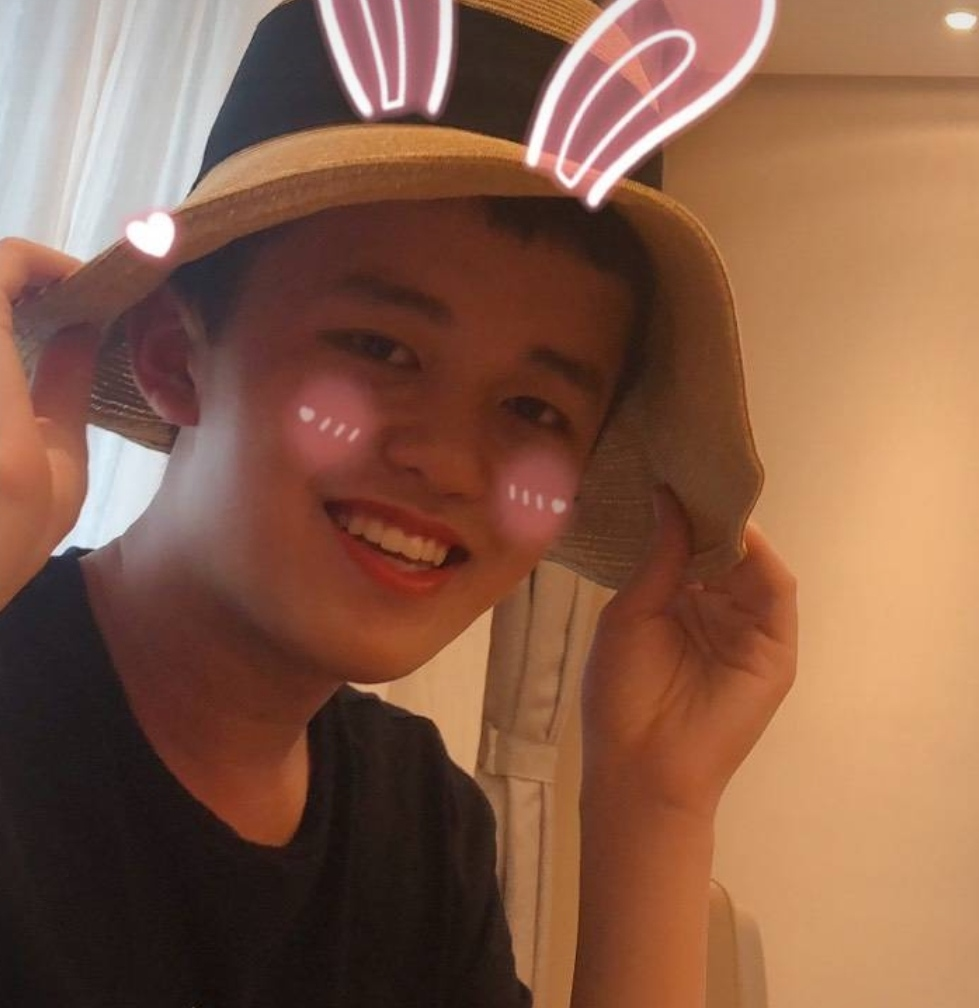

In [21]:
img

In [22]:
img_t = preprocess(img)

In [23]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [24]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
out = resnet(batch_t)
out

tensor([[ 1.4281e+00,  2.4998e+00, -9.2370e-01, -1.1170e+00,  2.5017e+00,
          3.4565e+00,  4.0177e+00, -6.3342e-01, -2.0063e+00, -2.6758e+00,
         -3.4603e+00, -3.4623e+00, -1.2353e+00, -2.1510e+00, -1.1550e+00,
         -2.0675e+00, -3.7490e+00, -1.5090e+00, -3.2285e+00, -1.6006e+00,
         -4.2723e+00, -1.3195e+00, -3.4424e+00, -1.2479e+00, -2.0027e+00,
         -2.0475e+00, -6.6288e-01,  1.4001e+00,  1.1321e+00,  1.5280e+00,
         -3.2551e-02,  1.8610e+00,  1.9436e+00,  3.3898e+00,  1.8308e+00,
          2.7602e+00,  4.0075e+00,  3.2350e+00,  1.1919e+00, -1.2389e+00,
          8.8429e-01,  1.1462e+00, -4.3949e-02,  5.5093e-01,  2.1487e+00,
         -9.9558e-02,  1.1002e+00,  1.5793e+00, -1.7036e+00, -1.8014e+00,
         -3.0619e-01,  2.3191e+00,  2.2485e+00,  9.0983e-01,  1.1998e+00,
         -2.7264e-01, -4.7217e-01,  3.9332e-01, -1.4474e+00,  1.9479e+00,
          2.1031e+00,  1.8528e+00, -1.0500e+00, -7.5355e-01,  1.7168e-01,
         -1.4418e+00, -8.6315e-01,  6.

In [26]:
with open('./data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [27]:
_, index = torch.max(out, 1)

In [28]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [29]:
labels[index[0]], percentage[index[0]].item()

('cowboy hat, ten-gallon hat', 91.62120056152344)

In [30]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('cowboy hat, ten-gallon hat', 91.62120056152344),
 ('sombrero', 2.691725730895996),
 ('shower cap', 1.467894196510315),
 ('bonnet, poke bonnet', 1.1603474617004395),
 ('Band Aid', 0.7352638244628906)]